# Physics 305 Demo Notebook 7: First Passage Time Density - Fractional Brownian Motion

In this Demo Notebook, we calculate the first passage time density (FPTD) for fractional Brownian motion.

Recall the expression derived in class:


$ f(t) = -\frac{(x_0-x_c)}{\sqrt{2\pi [M(t)]^3}} \frac{\partial{M(t)}}{\partial{t}} \exp\left[-\frac{(x_0-x_c)^2}{2M(t)}\right],$

where $M(t)$ is the MSD. Specifically, we plug in the theoretical model for the MSD as a function of lag time and plot $f(t)$ for different values of $x_0-x_c$.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import gamma

## Example: Fractional Brownian Motion

For fractional Brownian motion, the MSD is given by

$ M(t) = \frac{t^{2H}}{2H[\Gamma(H+1/2)]^2} $,

where $H$ is the Hurst exponent. The first passage time density expression becomes:

$ f(t) = 2H\sqrt{\frac{c}{\pi}} \frac{1}{t^{H+1}} (x_c-x_0) \exp\left[-\frac{c(x_c-x_0)^2}{t^{2H}}\right], $

where $c = H \Gamma(H+1/2)^2$. The long time behavior of the first passage time, when $t^{2H} >> c(x_c-x_0)^2$, gives

$ f(t) \sim t^{-1-H}$.

For ordinary Brownian motion, $H = 1/2$ and the long time behavior is $\sim t^{-3/2}$.

Note that the expression depends only on the difference $x_c-x_0$. We define a function that returns the first passage time density, given the time grid, dx = $x_c-x_0$, and $H$ as inputs:

In [ ]:
def fptd_fbm(t, dx, H):
  c = H*gamma(H+0.5)**2
  f1 = 2*H*(c/np.pi/t**(2*H+2))**0.5
  f2 = dx
  f3 = np.exp(-1*c*(dx)**2/t**(2*H))
  return f1*f2*f3

Let us calculate $f(t)$ for different $H = 0.3, 0.5, 0.7$ and for each case, we plot curves for dx = 20, 40, 60.

In [ ]:
# define parameters to use
hs = np.array([0.3, 0.5, 0.7])
dxs = np.array([20, 40, 60])

nh = len(hs)
ndx = len(dxs)
print(nh, ndx)

(3, 3)


In [ ]:
# calculate values of c = H*gamma(H+1/2)**2
cs = hs*gamma(hs+0.5)**2
cs

array([0.40662925, 0.5       , 0.59012369])

In [ ]:
# define time grid
t = np.logspace(-3, 6, 1000)
nt = len(t)
nt

1000

In [ ]:
# initialize array to hold results
f_out = np.zeros((nt, nh, ndx))

# loop over H values
for i in np.arange(nh):
  H = hs[i]
  for j in np.arange(ndx):
    dx = dxs[j]
    f_out[:, i, j] = fptd_fbm(t, dx, H)

(1, 1000000.0)

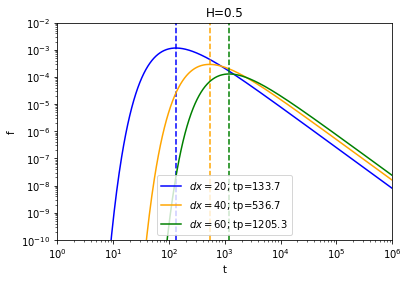

In [ ]:
#plot for H=0.5 (ordinary Brownian motion)
hval = 0.5
i=np.arange(nh)[hs==hval]

# set colors
colors = ["blue", "orange", "green"]

# initialize array for peak time
tpeak = np.zeros((ndx))
for j in np.arange(ndx):
  ipeak = np.argmax(f_out[:,i,j])
  tpeak[j] = t[ipeak]
  plt.plot(t, f_out[:,i,j], color=colors[j], label=r"$dx=$"+"%d; tp=%.1f" % (dxs[j], tpeak[j]))
  plt.axvline(tpeak[j], ls='--', color=colors[j])

plt.title("H=%.1f" % (hs[i]))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("f")
plt.legend(loc="best")
plt.minorticks_on()
plt.ylim((1e-10, 1e-2))
plt.xlim((1,1e6))

(1, 1000000.0)

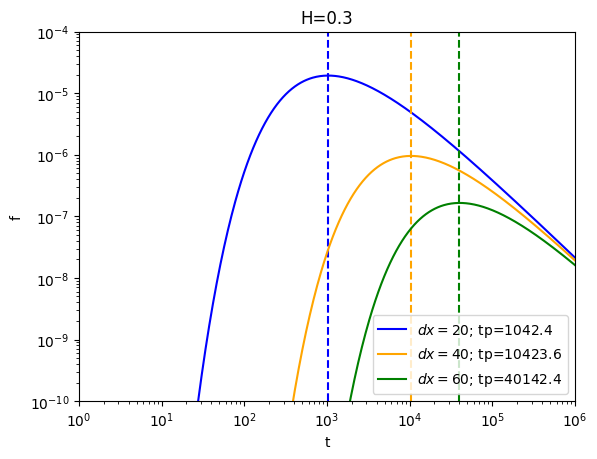

In [ ]:
#plot for H=0.3
hval = 0.3
i=np.arange(nh)[hs==hval]

# set colors
colors = ["blue", "orange", "green"]

# initialize array for peak time
tpeak = np.zeros((ndx))
for j in np.arange(ndx):
  ipeak = np.argmax(f_out[:,i,j])
  tpeak[j] = t[ipeak]
  plt.plot(t, f_out[:,i,j], color=colors[j], label=r"$dx=$"+"%d; tp=%.1f" % (dxs[j], tpeak[j]))
  plt.axvline(tpeak[j], ls='--', color=colors[j])

plt.title("H=%.1f" % (hs[i]))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("f")
plt.legend(loc="best")
plt.minorticks_on()
plt.ylim((1e-10, 1e-4))
plt.xlim((1,1e6))

(1, 1000000.0)

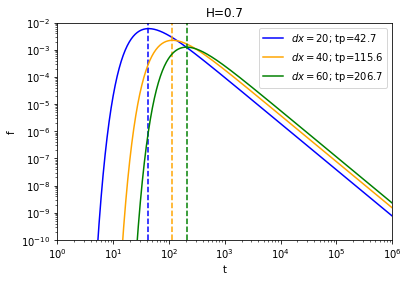

In [ ]:
#plot for H=0.7
hval = 0.7
i=np.arange(nh)[hs==hval]

# set colors
colors = ["blue", "orange", "green"]

# initialize array for peak time
tpeak = np.zeros((ndx))
for j in np.arange(ndx):
  ipeak = np.argmax(f_out[:,i,j])
  tpeak[j] = t[ipeak]
  plt.plot(t, f_out[:,i,j], color=colors[j], label=r"$dx=$"+"%d; tp=%.1f" % (dxs[j], tpeak[j]))
  plt.axvline(tpeak[j], ls='--', color=colors[j])

plt.title("H=%.1f" % (hs[i]))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("f")
plt.legend(loc="best")
plt.minorticks_on()
plt.ylim((1e-10, 1e-2))
plt.xlim((1,1e6))

We find that as expected, in all cases, the peak time increases with larger difference $x_c - x_0$. Superdiffusion also takes much less time to reach critical value compared with subdiffusion and ordinary BM (H=0.5).